## Predicting Player Engagement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
hitters = pd.read_csv('Hitters.csv', index_col=[0])
hitters.dropna(inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
# Codify categorical variables as integers
hitters['League'] = pd.factorize(hitters['League'])[0]
hitters['Division'] = pd.factorize(hitters['Division'])[0]
hitters['NewLeague'] = pd.factorize(hitters['NewLeague'])[0]
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [4]:
# Select all features but exclude 'Salary' or the one starting with'C'  
feature_cols = [h for h in hitters.columns if h[0]!='C' and h!='Salary']

X = hitters[feature_cols]
y = hitters['Salary']

### Decision Tree Model

In [5]:
max_depth_range = range(1, 21)

RMSE_scores = []

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

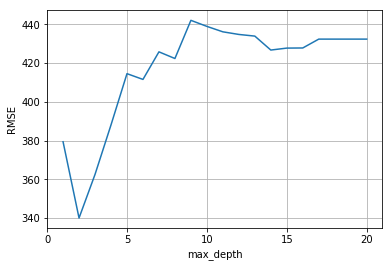

In [6]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.xticks(np.arange(0, 21, step=5))
plt.grid()
plt.show()

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Number of estimators to test
estimator_range = range(10, 310, 10)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid()
plt.show()

**Feature Importance**

In [ ]:
# Let's select n_estimators=150
rfreg = RandomForestRegressor(n_estimators=150, random_state=1)
rfreg.fit(X, y)

pd.DataFrame({'feature': feature_cols, 'Importance': rfreg.feature_importances_}).sort_values('Importance', ascending=False)

Years of activity is the most important feature to guess what his engagement will be.